**Importando librerias**

In [8]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot as plt

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# Modulo de optimizacion en scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

#Para las graficas
import seaborn as sns
import pandas as pd

**Creando dataset sintetico**

In [9]:
# Cargar el dataset original en un DataFrame
file_path = './WineQuality.csv'
df = pd.read_csv(file_path)

# Definir las columnas numéricas para añadir pequeñas variaciones (excepto la columna 'quality')
numeric_columns = df.select_dtypes(include=[np.float64]).columns
if 'quality' in numeric_columns:
    numeric_columns = numeric_columns.drop('quality')  # Excluir la columna 'quality' de las variaciones

# Duplicar el dataset
duplicated_df = df.copy()

# Añadir ruido gaussiano a las columnas numéricas dentro de un rango coherente
noise = np.random.normal(0, 0.01, duplicated_df[numeric_columns].shape)  # Ajustar el nivel de ruido según la necesidad
duplicated_df[numeric_columns] += noise

# Redondear los valores numéricos a la cantidad de decimales deseada (ej: 2 o 3 decimales)
duplicated_df[numeric_columns] = duplicated_df[numeric_columns].round(3)  # 3 decimales como en el dataset original

# Asegurar que 'quality' se mantenga como entero
duplicated_df['quality'] = duplicated_df['quality'].astype(int)

# 1. Añadir el atributo 'region'
regions = ['France', 'Italy', 'Spain', 'USA', 'Argentina']
df['region'] = np.random.choice(regions, size=len(df))
duplicated_df['region'] = np.random.choice(regions, size=len(duplicated_df))

# 2. Añadir el atributo 'organic' (booleano)
df['organic'] = np.random.choice([True, False], size=len(df))
duplicated_df['organic'] = np.random.choice([True, False], size=len(duplicated_df))

# 3. Añadir el atributo 'wine_code' (alfanumérico único)
df['wine_code'] = ['WINE-' + str(i).zfill(5) for i in range(len(df))]
duplicated_df['wine_code'] = ['WINE-' + str(i + len(df)).zfill(5) for i in range(len(duplicated_df))]

# Concatenar el dataset original y el dataset duplicado
final_df = pd.concat([df, duplicated_df])

# Limitar el valor de pH entre 2.8 y 3.8
final_df['pH'] = np.clip(final_df['pH'], 2.8, 3.8)

# Guardar el nuevo dataset en un archivo
final_df.to_csv('WineQuality_Duplicated.csv', index=False)

print("Dataset duplicado con nuevos atributos creado con éxito.")

Dataset duplicado con nuevos atributos creado con éxito.


**Graficando dataset sintetico**

In [10]:
# Cargar el archivo CSV
file_path = os.path.join('./', 'WineQuality_Duplicated.csv')
data = np.genfromtxt(file_path, delimiter=',', skip_header=1, dtype=str)

# Extraer la columna 'type'
type_column = data[:, -4]

# Convertir la columna 'type' a valores numéricos
# Asumimos que 'White Wine' será 1 y 'Red Wine' será 0
type_numeric = np.where(type_column == 'White Wine', 1, 0)

# Reemplazar la columna 'type' en el array original
data[:, -4] = type_numeric

# Convertir el array a tipo float excepto las 3 últimas columnas
# Identificar las columnas que no deben ser convertidas
cols_to_exclude = [-1, -2, -3]

# Separar las columnas que no deben ser convertidas
cols_excluded = data[:, cols_to_exclude]

# Separar las columnas que deben ser convertidas
cols_to_convert = np.delete(data, cols_to_exclude, axis=1)

# Convertir las columnas restantes a tipo float
cols_to_convert = cols_to_convert.astype(float)

# Combinar las columnas convertidas y no convertidas en un solo array
data_converted = np.column_stack((cols_to_convert, cols_excluded))


# Mover la columna en el índice 12 al final
column_to_move = data[:, 12]
data = np.delete(data, 12, axis=1)
data = np.column_stack((data, column_to_move))

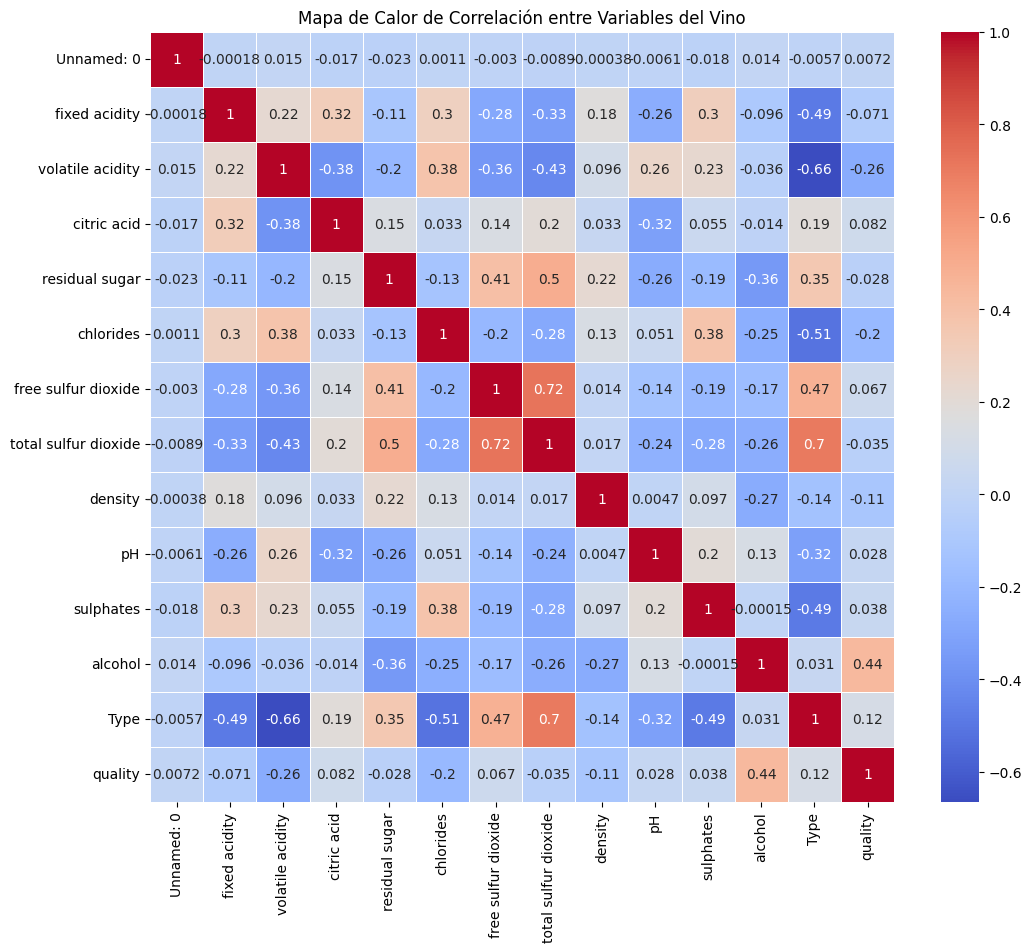

In [11]:
# Definir nombres de columnas (según las que tienes en el dataset WineQuality)
column_names = ['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 
                'sulphates', 'alcohol', 'Type', 'region', 'organic', 'wine_code', 'quality']

# Crear un DataFrame con Pandas
df = pd.DataFrame(data, columns=column_names)

# Excluir las columnas la penúltima, la antepenúltima y la anterior a la antepenúltima
df_numeric = df.drop(df.columns[[-2, -3, -4]], axis=1)

# Convertir las columnas numéricas a tipo float
df_numeric = df_numeric.astype(float)

# Graficar un mapa de calor de la correlación usando Seaborn
plt.figure(figsize=(12, 10))
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación entre Variables del Vino')
plt.show()

**Cargando dataset**

In [12]:
# Cargar el archivo CSV usando pandas
file_path = os.path.join('./', 'WineQuality_Duplicated.csv')
data = pd.read_csv(file_path)

# Convertir la columna 'type' a valores numéricos
# Asumimos que 'White Wine' será 1 y 'Red Wine' será 0
data['Type'] = data['Type'].apply(lambda x: 1 if x == 'White Wine' else 0)

# Convertir la columna organic a valores numéricos
# Asumimos que true será 1 y false será 0
data['organic'] = data['organic'].apply(lambda x: 1 if x == 'true' else 0)

# Mover la penúltima columna a la última posición
cols = list(data.columns)
cols.append(cols.pop(-2))
data = data[cols]
# Eliminar la columna 'wine_code' y region
data = data.drop(['wine_code', 'region'], axis=1)

# mover la columna 'quality' al final
cols = list(data.columns)
cols.append(cols.pop(-3))
data = data[cols]

data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type,organic,quality
0,2732,7.400,0.170,0.290,1.400,0.047,23.000,107.000,0.99390,3.520,0.650,10.400,1,0,6
1,2607,5.300,0.310,0.380,10.500,0.031,53.000,140.000,0.99321,3.340,0.460,11.700,1,0,6
2,1653,4.700,0.145,0.290,1.000,0.042,35.000,90.000,0.99080,3.760,0.490,11.300,1,0,6
3,3264,6.900,0.260,0.290,4.200,0.043,33.000,114.000,0.99020,3.160,0.310,12.500,1,0,6
4,4931,6.400,0.450,0.070,1.100,0.030,10.000,131.000,0.99050,2.970,0.280,10.800,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64965,2838,4.997,0.258,0.224,2.686,0.059,45.993,153.008,0.99200,3.757,0.748,11.285,1,0,6
64966,6414,6.612,0.359,0.505,11.288,0.046,7.994,110.015,1.00000,3.060,0.482,9.405,1,0,5
64967,1126,6.314,0.204,0.246,1.710,0.044,36.008,134.988,0.98300,3.800,0.665,10.813,1,0,6
64968,2924,6.200,0.195,0.336,5.412,0.027,20.988,74.985,0.98200,3.360,0.418,13.511,1,0,7


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64970 entries, 0 to 64969
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            64970 non-null  int64  
 1   fixed acidity         64970 non-null  float64
 2   volatile acidity      64970 non-null  float64
 3   citric acid           64970 non-null  float64
 4   residual sugar        64970 non-null  float64
 5   chlorides             64970 non-null  float64
 6   free sulfur dioxide   64970 non-null  float64
 7   total sulfur dioxide  64970 non-null  float64
 8   density               64970 non-null  float64
 9   pH                    64970 non-null  float64
 10  sulphates             64970 non-null  float64
 11  alcohol               64970 non-null  float64
 12  Type                  64970 non-null  int64  
 13  organic               64970 non-null  int64  
 14  quality               64970 non-null  int64  
dtypes: float64(11), int

In [14]:
print(pd.isnull(data).sum())

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Type                    0
organic                 0
quality                 0
dtype: int64


In [15]:
print(data['quality'].value_counts())

quality
6    28234
5    21510
7    10742
4     2288
8     1882
3      266
9       48
Name: count, dtype: int64


In [16]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [17]:
# Convertir el DataFrame a un array de numpy
data_array = data.values

# Definir el tamaño del conjunto de entrenamiento (80% de los datos)
train_size = int(0.8 * len(data_array))

# Barajar los datos
np.random.shuffle(data_array)

# Separar características y etiquetas en el array completo
X = data_array[:, np.arange(data_array.shape[1]) != 14]  # Excluir la ultima columna
y = data_array[:, 14]   # Seleccionar la ultima columna como la variable objetivo

# Dividir los datos en entrenamiento y prueba
train_X = X[:train_size]
train_y = y[:train_size]
test_X = X[train_size:]
test_y = y[train_size:]

# Verificar la forma de los conjuntos
print(f'Tamaño del conjunto de entrenamiento: {train_X.shape[0]}')
print(f'Tamaño del conjunto de prueba: {test_X.shape[0]}')

Tamaño del conjunto de entrenamiento: 51976
Tamaño del conjunto de prueba: 12994


**Regresion logistica binaria**

In [18]:
def calcularSigmoide(z):
    # Calcula la sigmoide de z.

    return 1.0 / (1.0 + np.exp(-z))

In [19]:
# Función de coste con regularización
def calcularCosto(theta, X, y, lambda_):
    m = len(y)
    h = calcularSigmoide(X @ theta)
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (-1 / m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h))) + reg_term

    grad = (1 / m) * X.T @ (h - y)
    grad[1:] += (lambda_ / m) * theta[1:]

    return J, grad

In [20]:
# Gradiente descendente que guarda el coste y la precisión en cada epoch
def gradient_descent(X, y, theta, lambda_, alpha, num_iters):
    J_history = []
    accuracy_history = []
    
    for _ in range(num_iters):
        J, grad = calcularCosto(theta, X, y, lambda_)
        theta -= alpha * grad
        J_history.append(J)  # Guardar el costo en cada epoch
        
        # Calcular y guardar la precisión en el conjunto de entrenamiento
        predictions = calcularSigmoide(X @ theta) >= 0.5
        accuracy = np.mean(predictions == y) * 100
        accuracy_history.append(accuracy)
    
    return theta, J_history, accuracy_history


In [21]:
# Regresión logística binaria para cada clase
def binary_logistic_regression(X, y, num_labels, lambda_, alpha, num_iters):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n))
    all_J_history = []  # Para guardar el historial de costo por clase
    all_accuracy_history = []  # Para guardar el historial de precisión por clase
    
    # Entrenamos un modelo de regresión logística binaria para cada clase
    for i in range(num_labels):
        initial_theta = np.zeros(n)
        y_i = (y == i+1).astype(int)  # Crear etiquetas binarias para la clase i
        theta, J_history, accuracy_history = gradient_descent(X, y_i, initial_theta, lambda_, alpha, num_iters)
        all_theta[i] = theta
        all_J_history.append(J_history)  # Guardar historial de costo
        all_accuracy_history.append(accuracy_history)  # Guardar historial de precisión
    
    return all_theta, all_J_history, all_accuracy_history


In [22]:
# Predicción
def predict_binary(all_theta, X):
    probabilities = calcularSigmoide(X @ all_theta.T)
    return np.argmax(probabilities, axis=1) + 1  # Clase con la mayor probabilidad

In [23]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [24]:
# Normalizar las características
X_train_norm, mu, sigma = featureNormalize(train_X)
X_test_norm = (test_X - mu) / sigma

In [25]:
# Se anade una columna de unos a X train y X test
X_train = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_test = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])

In [26]:
# Parámetros del modelo
num_labels = len(np.unique(train_y))  # Número de clases
lambda_ = 0.1
alpha = 0.01
num_iters = 25000

# Realizar el entrenamiento y obtener el historial de costo y precisión
all_theta, all_J_history, all_accuracy_history = binary_logistic_regression(X_train, train_y, num_labels, lambda_, alpha, num_iters)

In [27]:
train_pred = predict_binary(all_theta, X_train)
train_accuracy = np.mean(train_pred == train_y) * 100
print(f'Precisión en conjunto de entrenamiento: {train_accuracy:.2f}%')

# Realizar las predicciones para el conjunto de prueba
test_pred = predict_binary(all_theta, X_test)
test_accuracy = np.mean(test_pred == test_y) * 100
print(f'Precisión en conjunto de prueba: {test_accuracy:.2f}%')

Precisión en conjunto de entrenamiento: 54.18%
Precisión en conjunto de prueba: 54.25%


In [28]:
data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type,organic,quality
0,2732,7.400,0.170,0.290,1.400,0.047,23.000,107.000,0.99390,3.520,0.650,10.400,1,0,6
1,2607,5.300,0.310,0.380,10.500,0.031,53.000,140.000,0.99321,3.340,0.460,11.700,1,0,6
2,1653,4.700,0.145,0.290,1.000,0.042,35.000,90.000,0.99080,3.760,0.490,11.300,1,0,6
3,3264,6.900,0.260,0.290,4.200,0.043,33.000,114.000,0.99020,3.160,0.310,12.500,1,0,6
4,4931,6.400,0.450,0.070,1.100,0.030,10.000,131.000,0.99050,2.970,0.280,10.800,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64965,2838,4.997,0.258,0.224,2.686,0.059,45.993,153.008,0.99200,3.757,0.748,11.285,1,0,6
64966,6414,6.612,0.359,0.505,11.288,0.046,7.994,110.015,1.00000,3.060,0.482,9.405,1,0,5
64967,1126,6.314,0.204,0.246,1.710,0.044,36.008,134.988,0.98300,3.800,0.665,10.813,1,0,6
64968,2924,6.200,0.195,0.336,5.412,0.027,20.988,74.985,0.98200,3.360,0.418,13.511,1,0,7


In [29]:
# Seleccionar las columnas correctas que se usaron para entrenar (ajusta el rango si es necesario)
X_new = data.iloc[4, :-1].values


# Normalizar el nuevo dato usando mu y sigma obtenidos del entrenamiento
X_new_norm = (X_new - mu) / sigma

# Añadir la columna de unos para el bias term
X_new_norm = np.hstack([np.ones((1, 1)), X_new_norm.reshape(1, -1)])

# Realizar la predicción
new_pred = predict_binary(all_theta, X_new_norm)

# Imprimir la predicción
print(f'Predicción para el nuevo registro: {new_pred}')

Predicción para el nuevo registro: [5]


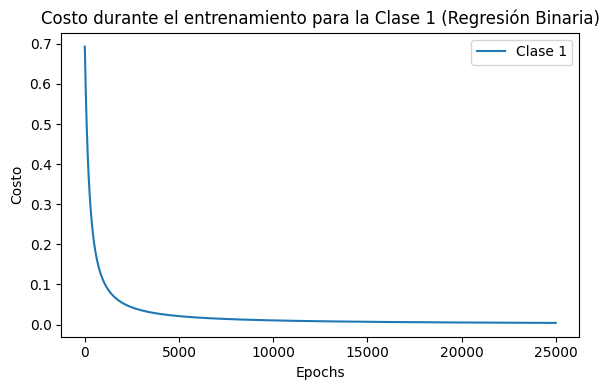

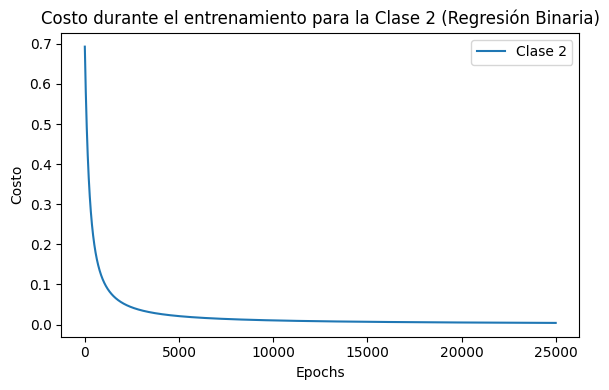

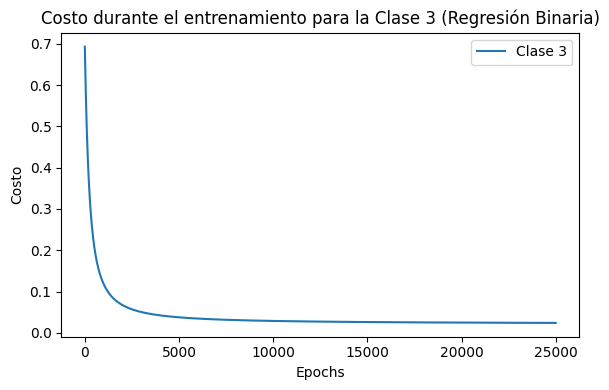

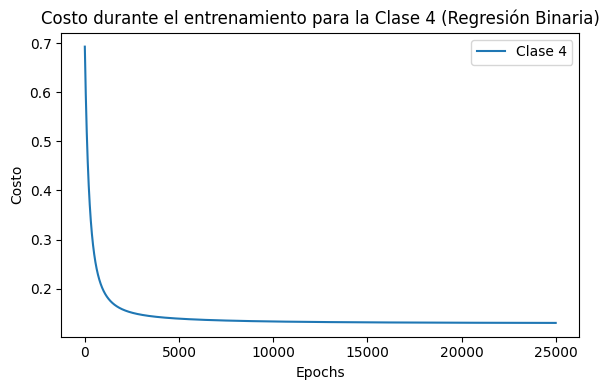

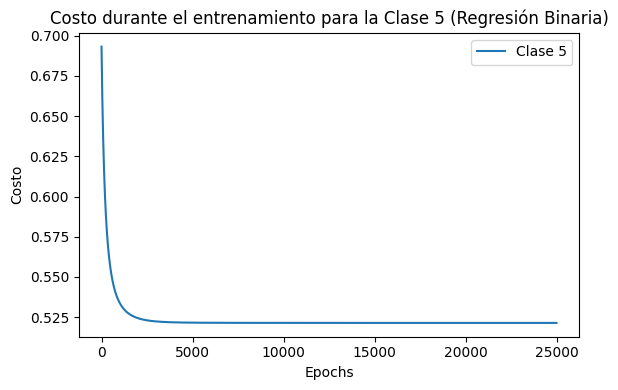

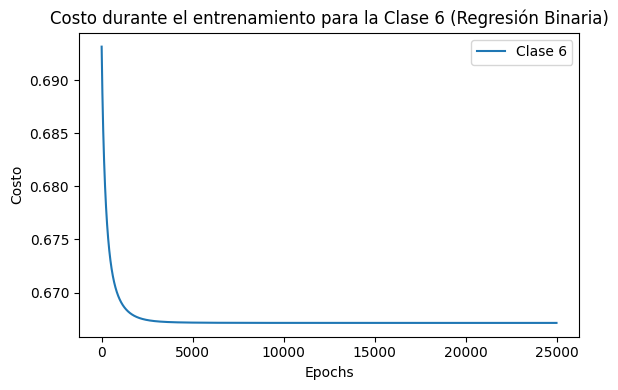

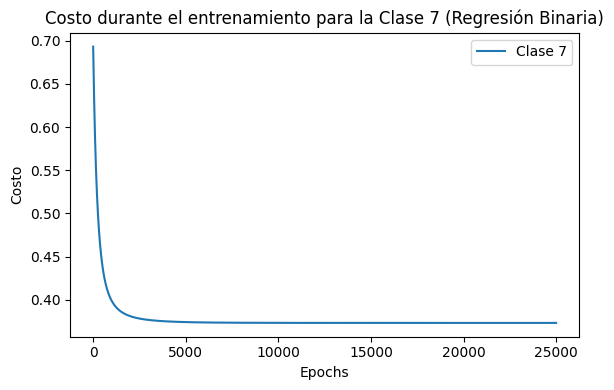

In [30]:
# Visualización del costo y la precisión

# Graficar el costo por clase
for i in range(num_labels):
    plt.figure(figsize=(6, 4))
    plt.plot(all_J_history[i], label=f'Clase {i+1}')
    plt.title(f'Costo durante el entrenamiento para la Clase {i+1} (Regresión Binaria)')
    plt.xlabel('Epochs')
    plt.ylabel('Costo')
    plt.legend()
    plt.tight_layout()
    plt.show()

**Regresion logistica One vs All**

In [31]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    sigma[sigma == 0] = 1  # Evitar división por cero
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [32]:
X_train_norm, mu, sigma = feature_normalize(train_X)
X_test_norm = (test_X - mu) / sigma

In [33]:
X_train = np.hstack([np.ones((X_train_norm.shape[0], 1)), X_train_norm])
X_test = np.hstack([np.ones((X_test_norm.shape[0], 1)), X_test_norm])

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [35]:
def cost_function(theta, X, y, lambda_):
    m = len(y)
    h = sigmoid(X @ theta)
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (-1 / m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h))) + reg_term

    grad = (1 / m) * X.T @ (h - y)
    grad[1:] += (lambda_ / m) * theta[1:]

    return J, grad

In [36]:
def one_vs_all(X, y, num_labels, lambda_, alpha, num_iters):
    n = X.shape[1]
    all_theta = np.zeros((num_labels, n))
    all_J_history = []  # Lista para almacenar los historiales de costos

    for i in range(num_labels):
        initial_theta = np.zeros(n)
        y_i = (y == i + 1).astype(int)
        theta, J_history = gradient_descent(X, y_i, initial_theta, lambda_, alpha, num_iters)
        all_theta[i] = theta
        all_J_history.append(J_history)  # Guardar el historial de costos para esta clase

    return all_theta, all_J_history  # Retorna all_J_history en lugar de J_history


In [37]:
def gradient_descent(X, y, theta, lambda_, alpha, num_iters):
    J_history = []

    for _ in range(num_iters):
        J, grad = cost_function(theta, X, y, lambda_)
        theta = theta - alpha * grad
        J_history.append(J)

    return theta, J_history

In [38]:
# Función para predecir
def predict_one_vs_all(all_theta, X):
    return np.argmax(sigmoid(X @ all_theta.T), axis=1) + 1

In [39]:
# Parámetros para el entrenamiento
num_labels = len(np.unique(train_y))
lambda_ = 0.1
alpha = 0.01
num_iters = 10000

In [40]:
all_theta, all_J_history = one_vs_all(X_train, train_y, num_labels, lambda_, alpha, num_iters)

In [41]:
J_train, _ = cost_function(all_theta[0], X_train, (train_y == 1).astype(int), lambda_)
print(f'Costo en el conjunto de entrenamiento : {J_train:.4f}')

J_test, _ = cost_function(all_theta[0], X_test, (test_y == 1).astype(int), lambda_)
print(f'Costo en el conjunto de prueba : {J_test:.4f}')

# Calcular la precisión en el conjunto de entrenamiento y prueba
train_pred = predict_one_vs_all(all_theta, X_train)
train_accuracy = np.mean(train_pred == train_y) * 100
print(f'Precisión en conjunto de entrenamiento: {train_accuracy:.2f}%')

test_pred = predict_one_vs_all(all_theta, X_test)
test_accuracy = np.mean(test_pred == test_y) * 100
print(f'Precisión en conjunto de prueba: {test_accuracy:.2f}%')

Costo en el conjunto de entrenamiento : 0.0103
Costo en el conjunto de prueba : 0.0103
Precisión en conjunto de entrenamiento: 54.09%
Precisión en conjunto de prueba: 54.21%


In [42]:
data

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Type,organic,quality
0,2732,7.400,0.170,0.290,1.400,0.047,23.000,107.000,0.99390,3.520,0.650,10.400,1,0,6
1,2607,5.300,0.310,0.380,10.500,0.031,53.000,140.000,0.99321,3.340,0.460,11.700,1,0,6
2,1653,4.700,0.145,0.290,1.000,0.042,35.000,90.000,0.99080,3.760,0.490,11.300,1,0,6
3,3264,6.900,0.260,0.290,4.200,0.043,33.000,114.000,0.99020,3.160,0.310,12.500,1,0,6
4,4931,6.400,0.450,0.070,1.100,0.030,10.000,131.000,0.99050,2.970,0.280,10.800,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64965,2838,4.997,0.258,0.224,2.686,0.059,45.993,153.008,0.99200,3.757,0.748,11.285,1,0,6
64966,6414,6.612,0.359,0.505,11.288,0.046,7.994,110.015,1.00000,3.060,0.482,9.405,1,0,5
64967,1126,6.314,0.204,0.246,1.710,0.044,36.008,134.988,0.98300,3.800,0.665,10.813,1,0,6
64968,2924,6.200,0.195,0.336,5.412,0.027,20.988,74.985,0.98200,3.360,0.418,13.511,1,0,7


In [43]:
# Seleccionar las primeras
X_new = data.iloc[-3, :-1].values

# Normalizar el nuevo dato usando mu y sigma obtenidos del entrenamiento
X_new_norm = (X_new - mu) / sigma

# Añadir la columna de unos para el bias term
X_new_norm = np.hstack([np.ones((1, 1)), X_new_norm.reshape(1, -1)])
# Realizar la predicción
new_pred = predict_one_vs_all(all_theta, X_new_norm)

# Imprimir la predicción
print(f'Predicción para el nuevo registro: {new_pred[0]}')

Predicción para el nuevo registro: 6


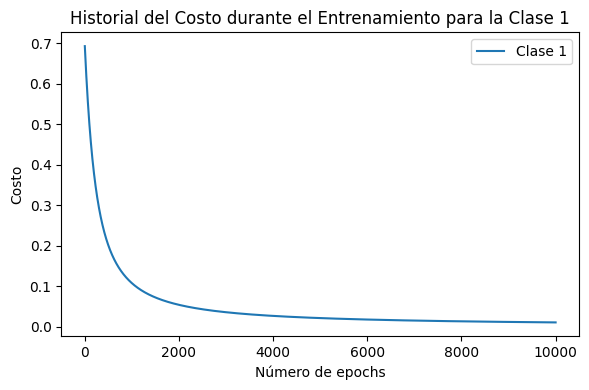

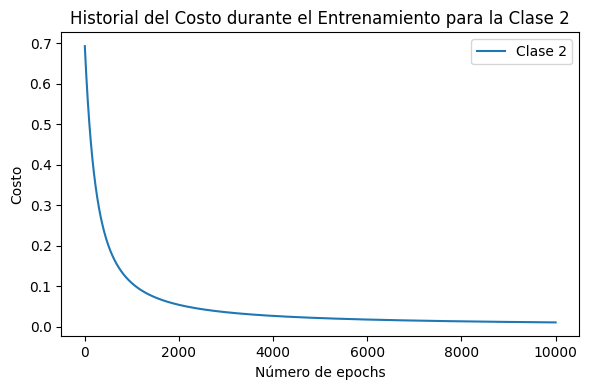

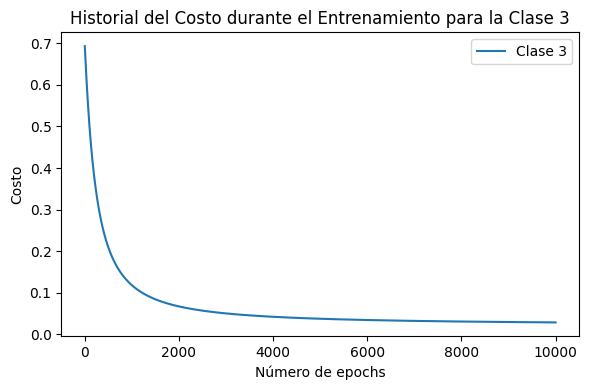

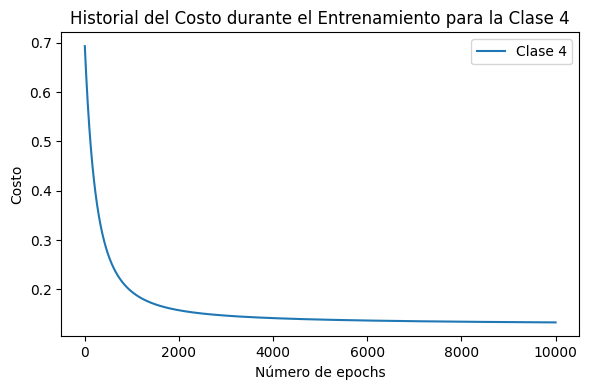

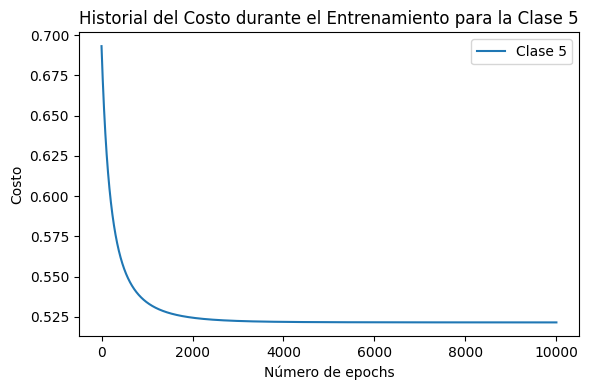

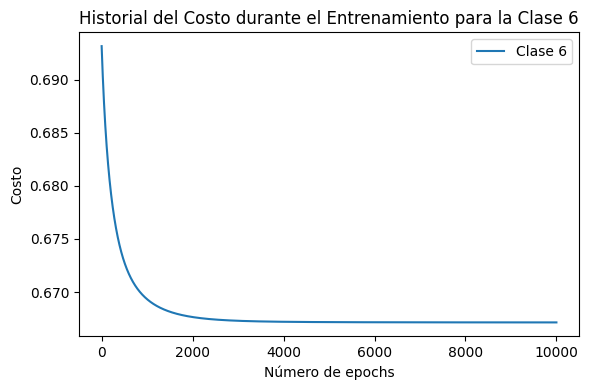

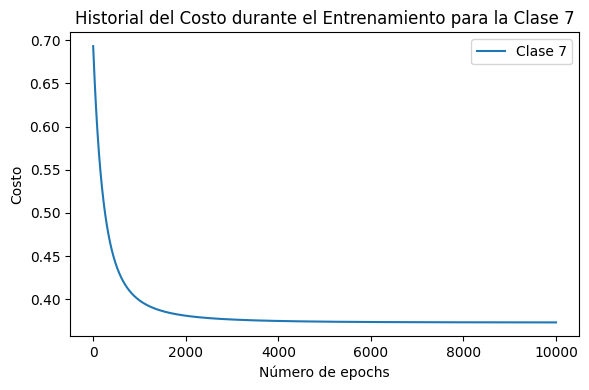

In [44]:
# Graficar el costo por clase
for i in range(num_labels):
    plt.figure(figsize=(6, 4))
    plt.plot(range(num_iters), all_J_history[i], label=f'Clase {i+1}')  # Graficar historial por clase
    plt.xlabel('Número de epochs')
    plt.ylabel('Costo')
    plt.title(f'Historial del Costo durante el Entrenamiento para la Clase {i+1}')
    plt.legend()
    plt.tight_layout()
    plt.show()

